# Preprocessing, Epochs and Analysis - Group 3
Note: Data used is Group 4's.

## Setting up Python

In [30]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import os

## 1. Load the data

In [31]:
# Reading the file & loading in the data
raw = mne.io.read_raw_brainvision('group4.vhdr', eog=('HEOG', 'VEOG'), misc=['41'], scale=1.0, preload=False, verbose=None)
raw.load_data()

Extracting parameters from group4.vhdr...
Setting channel info structure...
Reading 0 ... 1295079  =      0.000 ...  1295.079 secs...


/tmp/ipykernel_3495/455036898.py:2: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision('group4.vhdr', eog=('HEOG', 'VEOG'), misc=['41'], scale=1.0, preload=False, verbose=None)


Measurement date,"February 28, 2024 10:51:55 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


Specify the channel locations using the *montage-related* functions:

In [32]:
montage = mne.channels.make_standard_montage('standard_1020') 
raw.set_montage(montage, verbose=False)

Measurement date,"February 28, 2024 10:51:55 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


Redefine the reference to a common average: 

In [33]:
raw.set_eeg_reference('average', projection=True, verbose=False)

Measurement date,"February 28, 2024 10:51:55 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,"30 EEG, 2 EOG, 1 misc"
Bad channels,None
EOG channels,"HEOG, VEOG"
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,1000.00 Hz


Plotting the raw data

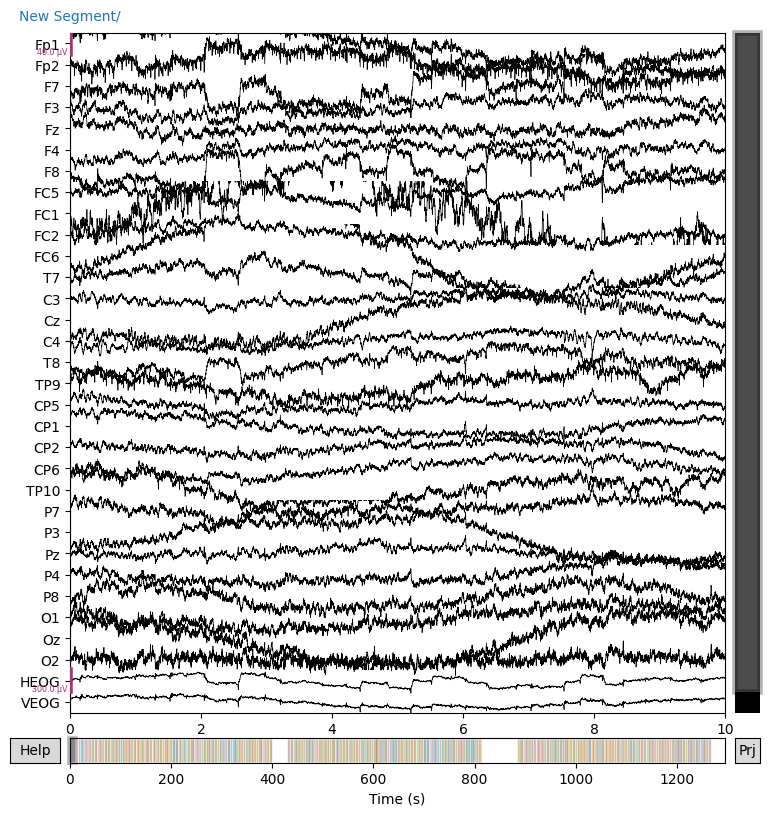

In [34]:
raw.plot(n_channels=32, scalings=dict(eeg=20e-6)); #Plotting all 32 channels

## 2. Removing bad channel 
Visual inspection showed that FC1 is 'bad'

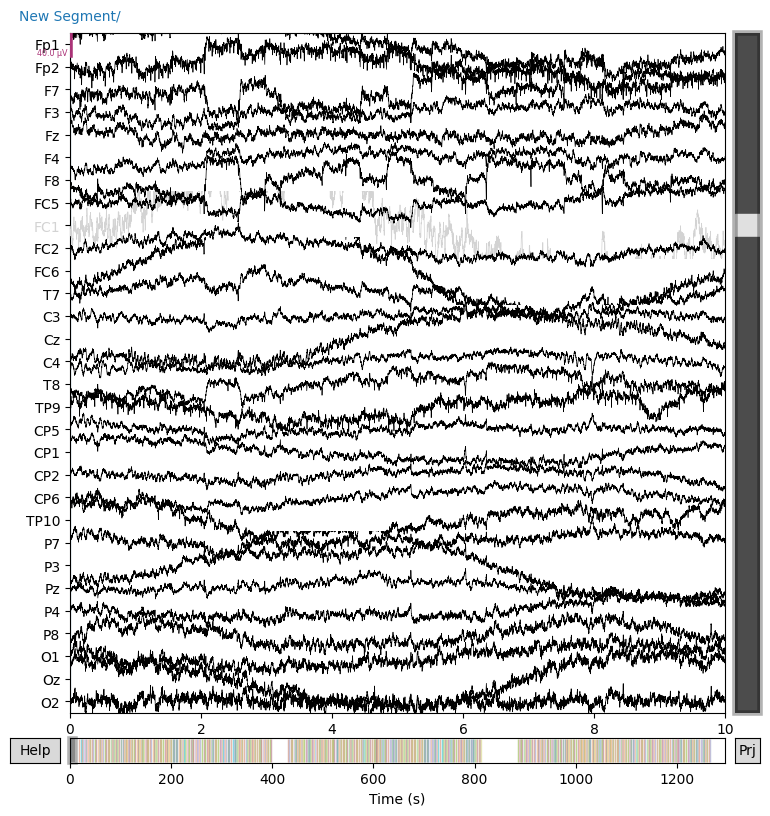

In [35]:
raw.info["bads"] = ["FC1"] 
raw.pick(["eeg"], exclude=['bads'])
raw.plot(n_channels=32, scalings=dict(eeg=20e-6));

## 3. Filtering
Highpass; 0.1 Hz; lowpass: 40 Hz.  Re-plotting data to inspect whether things look sensible

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


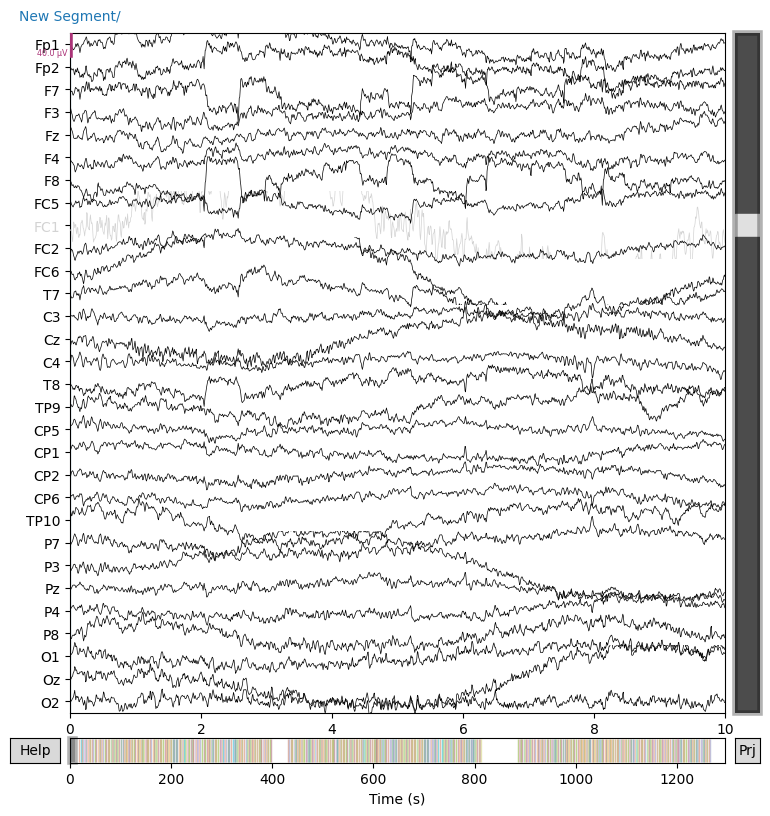

In [36]:
raw = raw.filter(0.1, 40)
raw.plot(n_channels=32, scalings=dict(eeg=20e-6)); #Plotting all 32 channels

## 4. Saving the preprocessed data

In [37]:
output_path = os.path.join(os.getcwd(), "preprocessed_data_Group3")

# make sure output path exists 
if not os.path.exists(output_path):
    os.mkdir(output_path)

# save the data
raw.save(os.path.join(output_path, 'preprocessed_data_Group3.fif'), overwrite=True)

Overwriting existing file.
Writing /work/HannahMaiHøjgaard#3708/EEG_analysis_HM/Wednesday_FaceWord_Analysis/preprocessed_data_Group3/preprocessed_data_Group3.fif


/tmp/ipykernel_3495/1609282449.py:8: RuntimeWarning: This filename (/work/HannahMaiHøjgaard#3708/EEG_analysis_HM/Wednesday_FaceWord_Analysis/preprocessed_data_Group3/preprocessed_data_Group3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(os.path.join(output_path, 'preprocessed_data_Group3.fif'), overwrite=True)


Closing /work/HannahMaiHøjgaard#3708/EEG_analysis_HM/Wednesday_FaceWord_Analysis/preprocessed_data_Group3/preprocessed_data_Group3.fif
[done]


------

## 5. Epochs

In [38]:
event, events_dict = mne.events_from_annotations(raw, event_id='auto')

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 41', 'Stimulus/S 42', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S201', 'Stimulus/S212']


In [39]:
events_dict

{'New Segment/': 99999,
 'Stimulus/S 11': 11,
 'Stimulus/S 12': 12,
 'Stimulus/S 13': 13,
 'Stimulus/S 21': 21,
 'Stimulus/S 22': 22,
 'Stimulus/S 31': 31,
 'Stimulus/S 32': 32,
 'Stimulus/S 41': 41,
 'Stimulus/S 42': 42,
 'Stimulus/S 51': 51,
 'Stimulus/S 52': 52,
 'Stimulus/S101': 101,
 'Stimulus/S102': 102,
 'Stimulus/S111': 111,
 'Stimulus/S112': 112,
 'Stimulus/S201': 201,
 'Stimulus/S212': 212}

Setting up an event_id-dictionary with the relevant event labels

In [40]:
event_id = {'Word/wPos': 11, # positive word
'Wait/wPos': 31, # waiting time after positive word 
'Image/wPos': 21, # positive image (always following pos word) 
'Word/wNeg': 12, # negative word
'Wait/wNeg': 32, # waiting time after negative word 
'Image/wNeg': 22, # negative image (always following neg word) 
'Word/wNeu': 13, # neutral word
'Wait/wNeu/iPos': 51, # wait time after neu w (before pos i) 
'Image/wNeu/iPos': 41, # positive image (after neu word) 
'Wait/wNeu/iNeg': 52, # wait time after neu w (before neg i) 
'Image/wNeu/iNeg': 42, # negative image (after neu word) 
'Correct/wPos': 101, # correct response ('b') to pos w + image 
'Correct/wNeg': 102, # correct response ('y') to neg w + image 
'Correct/wNeu/iPos': 111, # cor resp ('b') to neu w + pos image 
'Correct/wNeu/iNeg': 112, # cor resp ('y') to neu w + neg image 
#'Incorrect/wPos': 202, # incor resp ('y') to pos w + image 
'Incorrect/wNeg': 201, # incor resp ('b') to neg w + image 
'Incorrect/wNeu/iPos': 212 # incor resp ('y') to neu w + pos i 
#'Incorrect/Neu/iNeg': 211, # incor resp ('b') to neu w + neg i
}

Plotting an overview of the events in the data

/tmp/ipykernel_3495/3314184134.py:1: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(event, event_id=event_id);
/tmp/ipykernel_3495/3314184134.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(event, event_id=event_id);


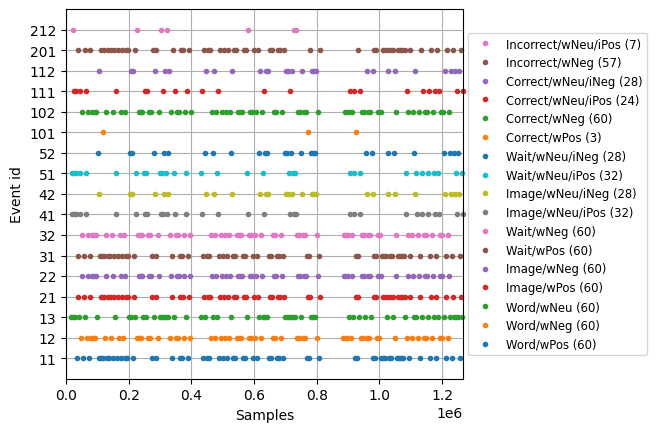

In [41]:
mne.viz.plot_events(event, event_id=event_id);

Seting the *time window* to -100 to 700 ms and the reject- criterion to 150 μV

In [42]:
tmin, tmax = -0.1, 0.7

# rejecting everything over or under a threshold of 150 microvolts
# anything above or belove this threshold is likely not brain activity but artefacts

reject = {'eeg': 150e-6}

In [43]:
epochs = mne.Epochs(
    raw, 
    events = event, 
    event_id = event_id, 
    tmin = tmin, 
    tmax = tmax, 
    baseline = (tmin, 0), 
    reject = reject, 
    preload = True
    )

Not setting metadata
719 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 719 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Cz']
5 bad epochs dropped


Since there was only 5 bad epochs dropped, there isn't reason to change the reject criterion. 

## 6. Saving the Epochs

In [44]:
outpath = os.path.join(os.getcwd(), 'epochs_group3')

if not os.path.exists(outpath):
    os.makedirs(outpath)

epochs.save(os.path.join(outpath, 'epochs_group3-epo.fif'), overwrite=True)

Overwriting existing file.
Overwriting existing file.


----

## 7. ERP Analysis

In [45]:
# Extract epochs for words and images
epochs_words = epochs['Word']
epochs_images = epochs['Image']


Not setting metadata
178 matching events found
No baseline correction applied
0 projection items activated


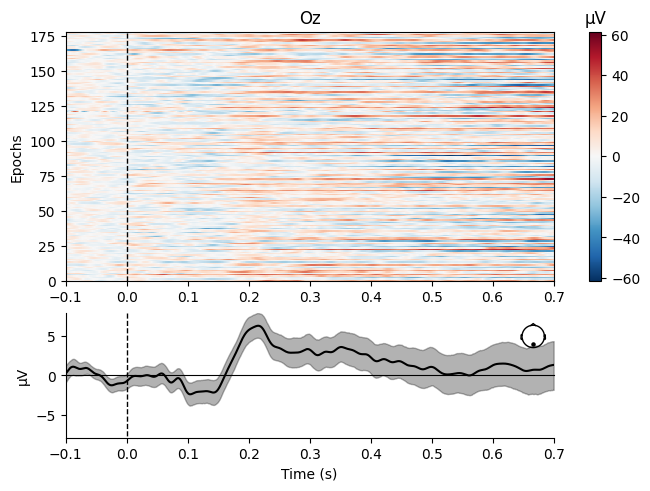

Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated


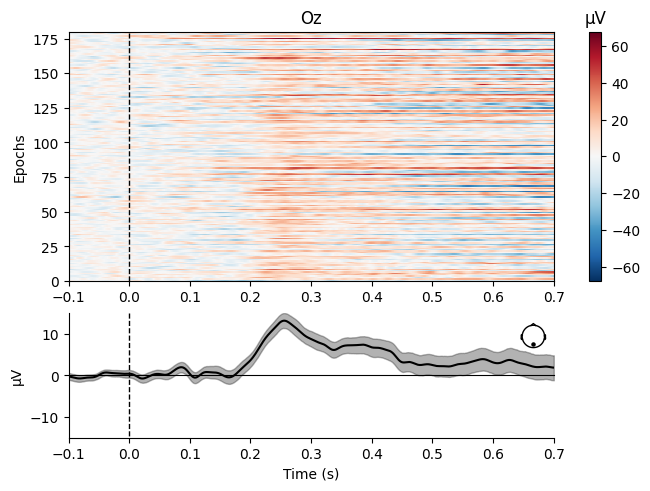

In [46]:
epochs_words.plot_image(picks=['Oz']);

epochs_images.plot_image(picks=['Oz']);

### Evoked Reponses
Unlike `Epochs`, which contain multiple trials that are each associated with a condition label (that is the event ID), `Evoked` objects are averages across trials for a single condition. Thus we have to create a separate `Evoked` object for each condition in our experiment.

In [47]:
evoked_words = epochs_words.average()
evoked_images = epochs_images.average()

Checking the shape of the Evoked objects

combining channels using "gfp"
combining channels using "gfp"


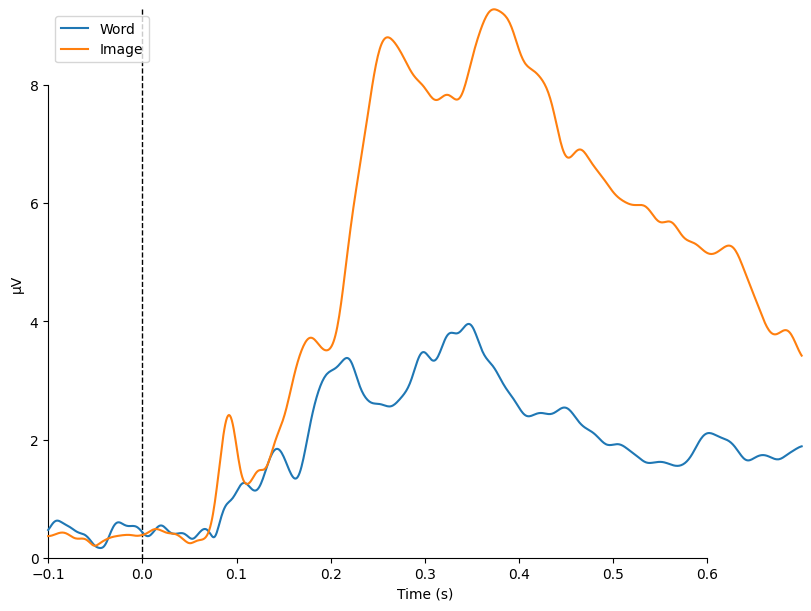

[<Figure size 800x600 with 1 Axes>]

In [48]:
mne.viz.plot_compare_evokeds({"Word":evoked_words, "Image":evoked_images})

Comparing the two Evokeds

Projections have already been applied. Setting proj attribute to True.


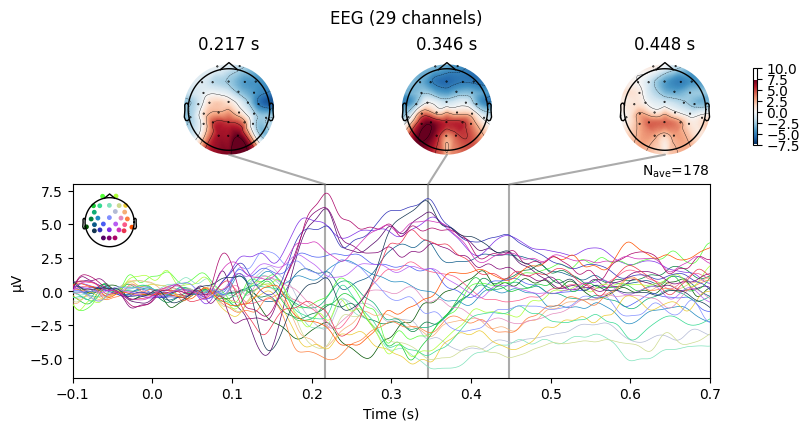

Projections have already been applied. Setting proj attribute to True.


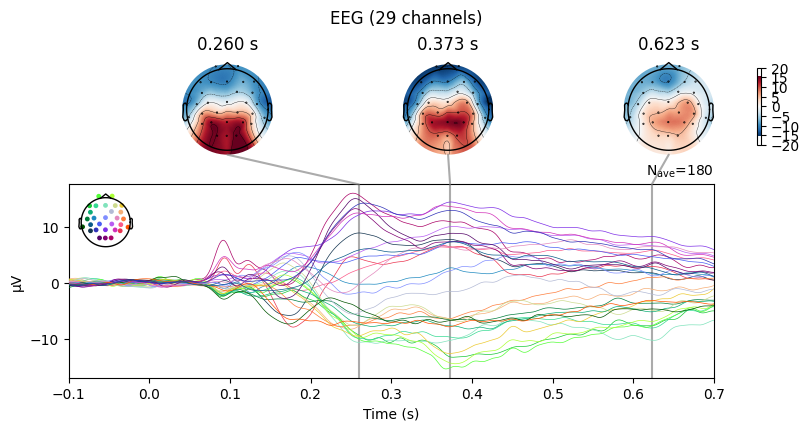

In [49]:
evoked_words.plot_joint();
evoked_images.plot_joint();

## 8. Report 

### Task 1

Include 2 plots of your group’s participant’s single trials to (1) all words and (2) all images from channel Oz.

*(hint for saving plots: assign your plot-call to a variable and use {plot_variable_name}.savefig())*

In [ ]:
epochs_words.plot_image(picks=['Oz']);

epochs_images.plot_image(picks=['Oz']);

### Task 2
Include 3 plots (joint butterfly + topographies) of your group’s participant’s ERPs to the (1) positive words, (2) negative words, and (3) neutral words

In [ ]:
pos_word_epochs = epochs['Word/wPos']
neg_word_epochs = epochs['Word/wNeg']
neu_word_epochs = epochs['Word/wNeu']

evoked_word_pos = pos_word_epochs.average()
evoked_word_neg = neg_word_epochs.average()
evoked_word_neu = neu_word_epochs.average()

evoked_word_pos.plot_joint();
evoked_word_neg.plot_joint();
evoked_word_neu.plot_joint();

### Task 3
Include 1 plot comparing the GFPs of your group’s participant’s ERPs to the images (1) following positive words, (2) negative words, and (3) neutral words

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


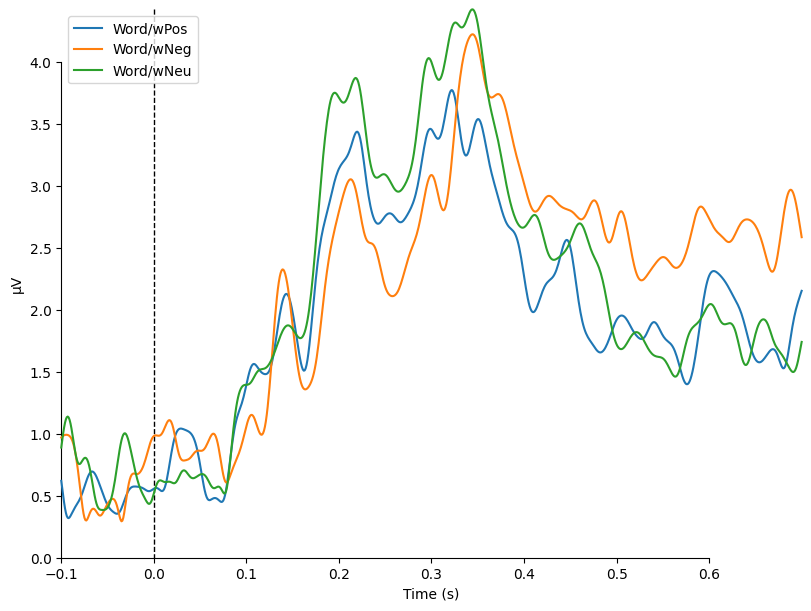

[<Figure size 800x600 with 1 Axes>]

In [60]:
mne.viz.plot_compare_evokeds({"Word/wPos":evoked_word_pos, "Word/wNeg":evoked_word_neg, "Word/wNeu":evoked_word_neu})